In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
import requests
from urllib.request import urlopen

In [2]:
#reading url

http_obj = urlopen('https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo,b5g')
webdata = http_obj.read()
print(webdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [3]:
#parsing via beautifulsoup

data = soup(webdata, 'html.parser')
data

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

## Getting links of all the pages

In [4]:
base='https://www.flipkart.com'
pages_link=data.find_all('a',class_='ge-49M')
base+pages_link[0]['href']

'https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page=1'

In [5]:
domain='https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page='
for i in range(2,24):
    link=domain+str(i)
    page_data=urlopen(link)
    webdata1=page_data.read()
    webdata += webdata1

In [6]:
alldata = soup(webdata, 'html.parser')
alldata

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [7]:
containers = alldata.find_all('div', class_='_2kHMtA')
len(containers)

528

In [8]:
f=open('laptops_all.csv','wb')
f.write('product_name,stars,rating,reviews,curr_price,mrp,processor,ram,image\n'.encode())

for container in containers:
    product = container.find('div', class_='_4rR01T')
    product_name=product.text.split('-')[0].strip()
    
    star = container.find('div', class_='_3LWZlK')
    try:
        stars=star.text
    except:
        stars=0
    
    ratings = container.find('span',class_='_2_R_DZ')
    try:
        rating=ratings.text.split()[0].replace(',','')
    except:
        rating=0
    
    review = container.find('span',class_='_2_R_DZ')
    try:
        reviews=review.text.split()[3].replace(',','')
    except:
        reviews=0
    
    curr_price = container.find('div', class_='_30jeq3 _1_WHN1').text.replace(',','').replace('₹','')
    
    MRP = container.find('div', class_='_3I9_wc _27UcVY')
    try:
        mrp=MRP.text.replace(',','').replace('₹','')
    except:
        mrp=0
    
    info=container.find_all('li',class_='rgWa7D')
    processor=info[0].text
    ram=info[1].text
    
    image_url=container.find('img',class_='_396cs4')
    image=image_url['src']
    
    print(product_name,stars,rating,reviews,curr_price,mrp,processor,ram,image)
    f.write(f'{product_name},{stars},{rating},{reviews},{curr_price},{mrp},{processor},{ram},{image}\n'.encode())
    print('\n')
f.close()

Ultimus Lite Celeron Dual Core 4.3 7 0 13990 20990 Intel Celeron Dual Core Processor 4 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/d/s/b/ultimus-pro-lite-thin-and-light-laptop-ultimus-original-imagrzn4xwt8s2dy.jpeg?q=70


Ultimus Elite Core i5 10th Gen 3.9 9 2 26990 45990 Intel Core i5 Processor (10th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/w/t/y/elite-thin-and-light-laptop-ultimus-original-imagrzkzbwgzavne.jpeg?q=70


ASUS Vivobook 15 Core i3 11th Gen 4.3 4381 396 37990 56990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/q/e/z/-original-imagpxgqesgrthks.jpeg?q=70


ASUS Vivobook 15 Core i5 11th Gen 4.3 2693 208 47990 70990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/n/h/v/-original-imagq9hcmgg3etg8.jpeg?q=70


HP 15s (2023) Intel Core i3 12th Gen 4.3 463 40 42990 51266 Intel Core i3 Processor 

Lenovo IdeaPad 3 Core i3 12th Gen 4 211 18 41990 67090 Intel Core i3 Processor (12th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/j/m/2/-original-imagpa5gadtkbm6y.jpeg?q=70


Infinix INBook Y1 Plus Intel Core i3 10th Gen 4.1 1746 225 27990 44990 Intel Core i3 Processor (10th Gen) 8 GB LPDDR4X RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/u/u/k/-original-imagmxuravjcmdwu.jpeg?q=70


Lenovo Athlon Dual Core 3050U 3.9 184 15 21490 35000 AMD Athlon Dual Core Processor 4 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/g/w/y/-original-imagmuhrzbmzwnee.jpeg?q=70


MSI Ryzen 5 Hexa Core 7530U 4.4 221 31 39990 61990 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/f/p/e/-original-imagnqmwkz8nfwth.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 4.2 1028 73 47290 84590 Intel Core i5 Processor (11th Gen) 16 GB DDR4 RAM https://rukminim2.flixcart.com/image/31

DELL Inspiron Core i3 11th Gen 4 818 100 41990 55534 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/ku5ufm80/computer/o/3/o/inspiron-3511-thin-and-light-laptop-dell-original-imag7csrvdhnsbdf.jpeg?q=70


Lenovo IdeaPad 3 Chromebook Intel Celeron Dual Core 3.4 1809 199 17999 25710 Intel Celeron Dual Core Processor 2 GB LPDDR4 RAM https://rukminim2.flixcart.com/image/312/312/ksyz8280/computer/8/v/i/cb-11igl05-thin-and-light-laptop-lenovo-original-imag6fh8sqpuk3ts.jpeg?q=70


Lenovo IdeaPad 3 Celeron Dual Core 4.4 172 28 29990 35590 Intel Celeron Dual Core Processor 4 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/keaaavk0/computer/x/m/y/lenovo-na-laptop-original-imafuzt8r5jqppfn.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.2 693 45 34999 59390 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


Ultimus Elite Core i5 10

ASUS VivoBook Ultra 14 Core i3 11th Gen 4.4 2878 405 44990 56990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/kh9gbrk0/computer/e/6/d/asus-na-thin-and-light-laptop-original-imafxbj7gbsraqzk.jpeg?q=70


DELL Vostro Ryzen 3 Quad Core 5425U 0 0 0 37990 50852 AMD Ryzen 3 Quad Core Processor 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/m/j/s/vostro-3425-thin-and-light-laptop-dell-original-imagjhbg6gyyc5j8.jpeg?q=70


Ultimus Elite Core i5 10th Gen 3.9 9 2 26990 45990 Intel Core i5 Processor (10th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/w/t/y/elite-thin-and-light-laptop-ultimus-original-imagrzkzbwgzavne.jpeg?q=70


Lenovo IdeaPad Ryzen 5 Hexa Core 5500U 4.3 2353 250 49490 86290 AMD Ryzen 5 Hexa Core Processor 16 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


DELL Vostro Ryzen 5 Quad Core 3500U 4.2 20 3 46490

DELL Inspiron Core i3 10th Gen 3.7 96 9 37990 47341 Intel Core i3 Processor (10th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/ku5ufm80/computer/o/3/o/inspiron-3511-thin-and-light-laptop-dell-original-imag7csrvdhnsbdf.jpeg?q=70


HP Ryzen 5 Hexa Core 5500U 4.3 577 53 44990 60990 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/k7531jk0/computer/e/a/h/hp-original-imafpfs893zu5mhb.jpeg?q=70


ASUS VivoBook 14 (2022) Core i5 11th Gen 4.2 722 60 49990 72990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/a/r/3/-original-imagpxgqpggsx6tm.jpeg?q=70


Lenovo IdeaPad Ryzen 5 Hexa Core 5500U 4.3 2353 250 49490 86290 AMD Ryzen 5 Hexa Core Processor 16 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.3 6893 635 38190 63190 Intel Core i3 Processor (11th Gen) 8 GB D

Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U 4.3 2353 250 45490 68490 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


MSI Ryzen 5 Hexa Core 7530U 4.4 221 31 39990 61990 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/f/p/e/-original-imagnqmwkz8nfwth.jpeg?q=70


HP Core i3 11th Gen 0 0 0 41999 46999 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/e/l/q/15s-laptop-hp-original-imagrzsvsyhfkrrq.jpeg?q=70


Lenovo Core i3 11th Gen 3.9 68 4 39499 42900 Intel Core i3 Processor (11th Gen) 4 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/ksuowi80/screen-guard/tempered-glass/s/b/y/lenovo-ideapad-slim-3-2021-11th-gen-intel-core-i5-15-6-original-imag6c6j77gcv3vu.jpeg?q=70


DELL Ryzen 3 Quad Core 5425U 4.3 59 4 41490 56834 Processor: R3-5425U (2.70 GHz up to 4.1 GHz) RAM & 

DELL Core i3 11th Gen 3.9 10 0 35500 58972 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/f/d/w/latitude-3420-business-laptop-dell-original-imagn6hrxsryasb6.jpeg?q=70


HP Core i3 11th Gen 3.9 13 0 37850 49990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/ky4qgsw0/computer/j/f/5/240-g8-laptop-hp-original-imagaffva46zgucg.jpeg?q=70


DELL Inspiron Core i3 10th Gen 4.2 46 4 43400 60490 Intel Core i3 Processor (10th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/kt8zb0w0/computer/n/m/v/inspiron-3511-thin-and-light-laptop-dell-original-imag6n5kbmfcgxk6.jpeg?q=70


DELL Vostro Core i3 10th Gen 4.1 121 13 47400 49800 Processor: 10th Generation Intel Core i3-1005G1 Processor (4MB Cache, up to 3.4 GHz) RAM & Storage:8GB RAM | 512GB M.2 PCIe NVMe Solid State Drive https://rukminim2.flixcart.com/image/312/312/l44hyfk0/computer/o/d/w/-original-imagf35eyyeezqpk.jpeg?q=70





AXL Celeron Dual Core 3.7 47 7 15999 31990 Intel Celeron Dual Core Processor 4 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/1/b/q/axl-vayu-book-thin-and-light-laptop-axl-original-imagrehvpjhwkdcd.jpeg?q=70


Primebook 4G Android Based MediaTek MT8788 4.1 502 160 14990 27990 MediaTek MediaTek MT8788 Processor 4 GB LPDDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/i/j/k/-original-imagzzsh3afavghf.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.3 6893 635 38190 63190 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/n/i/u/-original-imagpa5fbvqzk2xn.jpeg?q=70


DELL 3520 Core i3 11th Gen 0 0 0 38990 40000 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/r/k/a/dell-latitude-3520-core-i3-1115g4-8gb-ram-512gb-ssd-15-6-hd-original-imagrued6grgeh3n.jpeg?q=70


ASUS Core i5 10th Gen 4.2 33 3 46990 57990 Intel Core i5 P

In [9]:
df=pd.read_csv(r'laptops_all.csv',error_bad_lines=False, index_col=None)
df

C:\Users\gargs\AppData\Local\Temp\ipykernel_42756\376650449.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(r'laptops_all.csv',error_bad_lines=False, index_col=None)
Skipping line 21: expected 9 fields, saw 13
Skipping line 146: expected 9 fields, saw 11
Skipping line 354: expected 9 fields, saw 11
Skipping line 397: expected 9 fields, saw 10



product_name  stars  rating  reviews  \
0                  Ultimus Lite Celeron Dual Core    4.3       7        0   
1                  Ultimus Elite Core i5 10th Gen    3.9       9        2   
2               ASUS Vivobook 15 Core i3 11th Gen    4.3    4381      396   
3               ASUS Vivobook 15 Core i5 11th Gen    4.3    2693      208   
4            HP 15s (2023) Intel Core i3 12th Gen    4.3     463       40   
..                                            ...    ...     ...      ...   
519                DELL Inspiron Core i3 11th Gen    4.2      16        0   
520         DELL Inspiron Ryzen 3 Dual Core 3250U    4.5      66       11   
521                    HP Ryzen 5 Octa Core 3500u    3.3       3        0   
522  Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen    4.2    1028       73   
523                   MSI Ryzen 5 Hexa Core 7530U    4.4     221       31   

     curr_price    mrp                           processor             ram  \
0         13990  20990   Intel Celeron Dual Core Processor   4 GB DDR4 RAM   
1         26990  45990  Intel Core i5 Processor (10th Gen)   8 GB DDR4 RAM   
2         37990  56990  Intel Core i3 Processor (11th Gen)   8 GB DDR4 RAM   
3         47990  70990  Intel Core i5 Processor (11th Gen)   8 GB DDR4 RAM   
4         42990  51266  Intel Core i3 Processor (12th Gen)   8 GB DDR4 RAM   
..          ...    ...                                 ...             ...   
519       48190  56000  Intel Core i3 Processor (11th Gen)   8 GB DDR4 RAM   
520       43500  56000     AMD Ryzen 3 Dual Core Processor   8 GB DDR4 RAM   
521       36490  48990     AMD Ryzen 5 Octa Core Processor   8 GB DDR4 RAM   
522       47290  84590  Intel Core i5 Processor (11th Gen)  16 GB DDR4 RAM   
523       44990  64990     AMD Ryzen 5 Hexa Core Processor  16 GB DDR4 RAM   

                                                 image  
0    https://rukminim2.flixcart.com/image/312/312/x...  
1    https://rukminim2.flixcart.com/image/312/312/x...  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
519  https://rukminim2.flixcart.com/image/312/312/k...  
520  https://rukminim2.flixcart.com/image/312/312/k...  
521  https://rukminim2.flixcart.com/image/312/312/k...  
522  https://rukminim2.flixcart.com/image/312/312/x...  
523  https://rukminim2.flixcart.com/image/312/312/x...  

[524 rows x 9 columns]

In [10]:
df.shape

(524, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  524 non-null    object 
 1   stars         524 non-null    float64
 2   rating        524 non-null    int64  
 3   reviews       524 non-null    int64  
 4   curr_price    524 non-null    int64  
 5   mrp           524 non-null    int64  
 6   processor     524 non-null    object 
 7   ram           524 non-null    object 
 8   image         524 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 37.0+ KB


In [13]:
df2=df.drop_duplicates()
df2

product_name  stars  rating  reviews  \
0           Ultimus Lite Celeron Dual Core    4.3       7        0   
1           Ultimus Elite Core i5 10th Gen    3.9       9        2   
2        ASUS Vivobook 15 Core i3 11th Gen    4.3    4381      396   
3        ASUS Vivobook 15 Core i5 11th Gen    4.3    2693      208   
4     HP 15s (2023) Intel Core i3 12th Gen    4.3     463       40   
..                                     ...    ...     ...      ...   
515                HP 14s Core i3 10th Gen    4.2     828      111   
518  HP Chromebook Intel Celeron Dual Core    3.6     274       27   
519         DELL Inspiron Core i3 11th Gen    4.2      16        0   
520  DELL Inspiron Ryzen 3 Dual Core 3250U    4.5      66       11   
521             HP Ryzen 5 Octa Core 3500u    3.3       3        0   

     curr_price    mrp                           processor            ram  \
0         13990  20990   Intel Celeron Dual Core Processor  4 GB DDR4 RAM   
1         26990  45990  Intel Core i5 Processor (10th Gen)  8 GB DDR4 RAM   
2         37990  56990  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
3         47990  70990  Intel Core i5 Processor (11th Gen)  8 GB DDR4 RAM   
4         42990  51266  Intel Core i3 Processor (12th Gen)  8 GB DDR4 RAM   
..          ...    ...                                 ...            ...   
515       36750  36870  Intel Core i3 Processor (10th Gen)  4 GB DDR4 RAM   
518       24900  31990   Intel Celeron Dual Core Processor  4 GB DDR4 RAM   
519       48190  56000  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
520       43500  56000     AMD Ryzen 3 Dual Core Processor  8 GB DDR4 RAM   
521       36490  48990     AMD Ryzen 5 Octa Core Processor  8 GB DDR4 RAM   

                                                 image  
0    https://rukminim2.flixcart.com/image/312/312/x...  
1    https://rukminim2.flixcart.com/image/312/312/x...  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
515  https://rukminim2.flixcart.com/image/312/312/k...  
518  https://rukminim2.flixcart.com/image/312/312/k...  
519  https://rukminim2.flixcart.com/image/312/312/k...  
520  https://rukminim2.flixcart.com/image/312/312/k...  
521  https://rukminim2.flixcart.com/image/312/312/k...  

[297 rows x 9 columns]

## Product having highest rating

In [14]:
df2[df2['rating']==max(df2['rating'])]

product_name  stars  rating  reviews  \
173  ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3   12146     1167   

     curr_price    mrp                           processor            ram  \
173       35500  50990  Intel Core i3 Processor (10th Gen)  8 GB DDR4 RAM   

                                                 image  
173  https://rukminim2.flixcart.com/image/312/312/x...

## Top 5 laptops based on ratings

In [16]:
top_5_rated=df2.sort_values(by='rating',ascending=False).head()
top_5_rated

product_name  stars  rating  reviews  \
173      ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3   12146     1167   
5    Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen    4.3    6893      635   
439      ASUS VivoBook 15 (2022) Core i5 10th Gen    4.3    6698      556   
425                         ASUS Core i5 10th Gen    4.3    6698      556   
2               ASUS Vivobook 15 Core i3 11th Gen    4.3    4381      396   

     curr_price    mrp                           processor            ram  \
173       35500  50990  Intel Core i3 Processor (10th Gen)  8 GB DDR4 RAM   
5         38190  63190  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
439       46850  62990  Intel Core i5 Processor (10th Gen)  8 GB DDR4 RAM   
425       48990  62990  Intel Core i5 Processor (10th Gen)  8 GB DDR4 RAM   
2         37990  56990  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   

                                                 image  
173  https://rukminim2.flixcart.com/image/312/312/x...  
5    https://rukminim2.flixcart.com/image/312/312/x...  
439  https://rukminim2.flixcart.com/image/312/312/x...  
425  https://rukminim2.flixcart.com/image/312/312/x...  
2    https://rukminim2.flixcart.com/image/312/312/x...

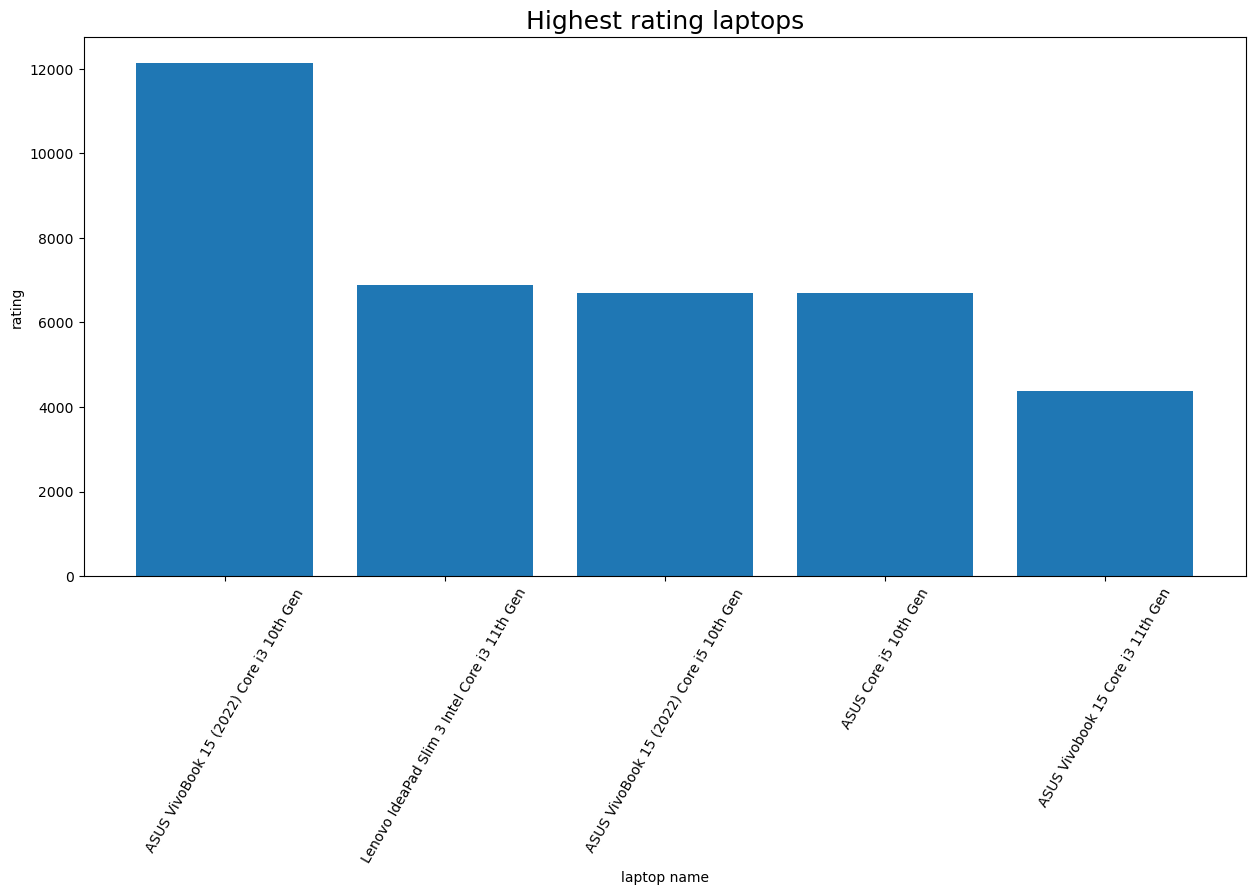

In [17]:
plt.figure(figsize=(15,7))
plt.bar(x=top_5_rated['product_name'],height=top_5_rated['rating'])
plt.title('Highest rating laptops',fontsize=18)
plt.xlabel('laptop name')
plt.ylabel('rating')
plt.xticks(rotation=60)
plt.show()

## Most affordable laptops

In [18]:
top10_affordable=df2.sort_values(by='curr_price',ascending=True).head(10)
top10_affordable

product_name  stars  rating  \
0                       Ultimus Lite Celeron Dual Core    4.3       7   
13                   ASUS Chromebook Celeron Dual Core    3.6     419   
7           Primebook 4G Android Based MediaTek MT8788    4.1    1507   
11          Primebook 4G Android Based MediaTek MT8788    4.1     502   
461                              AXL Celeron Dual Core    3.7      47   
481                 Avita SATUS S111 Celeron Dual Core    3.7    1236   
260                 Avita SATUS S111 Celeron Dual Core    3.7    1236   
122  Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...    3.4    1809   
217      ASUS Chromebook Touch Intel Celeron Dual Core    3.8    1950   
365                           Lenovo Celeron Dual Core    3.8     621   

     reviews  curr_price    mrp                           processor  \
0          0       13990  20990   Intel Celeron Dual Core Processor   
13        53       13990  24990   Intel Celeron Dual Core Processor   
7        467       13990  24990  MediaTek MediaTek MT8788 Processor   
11       160       14990  27990  MediaTek MediaTek MT8788 Processor   
461        7       15999  31990   Intel Celeron Dual Core Processor   
481      153       16490  29990   Intel Celeron Dual Core Processor   
260      153       16490  29990   Intel Celeron Dual Core Processor   
122      199       17999  25710   Intel Celeron Dual Core Processor   
217      280       18990  30990   Intel Celeron Dual Core Processor   
365       62       19990  36000   Intel Celeron Dual Core Processor   

                 ram                                              image  
0      4 GB DDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
13   4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/k...  
7    4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
11   4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
461    4 GB DDR4 RAM  https://rukminim2.flixcart.com/image/312/312/x...  
481    4 GB DDR4 RAM  https://rukminim2.flixcart.com/image/312/312/l...  
260    4 GB DDR4 RAM  https://rukminim2.flixcart.com/image/312/312/l...  
122  2 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/k...  
217  4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/l...  
365  4 GB LPDDR4 RAM  https://rukminim2.flixcart.com/image/312/312/l...

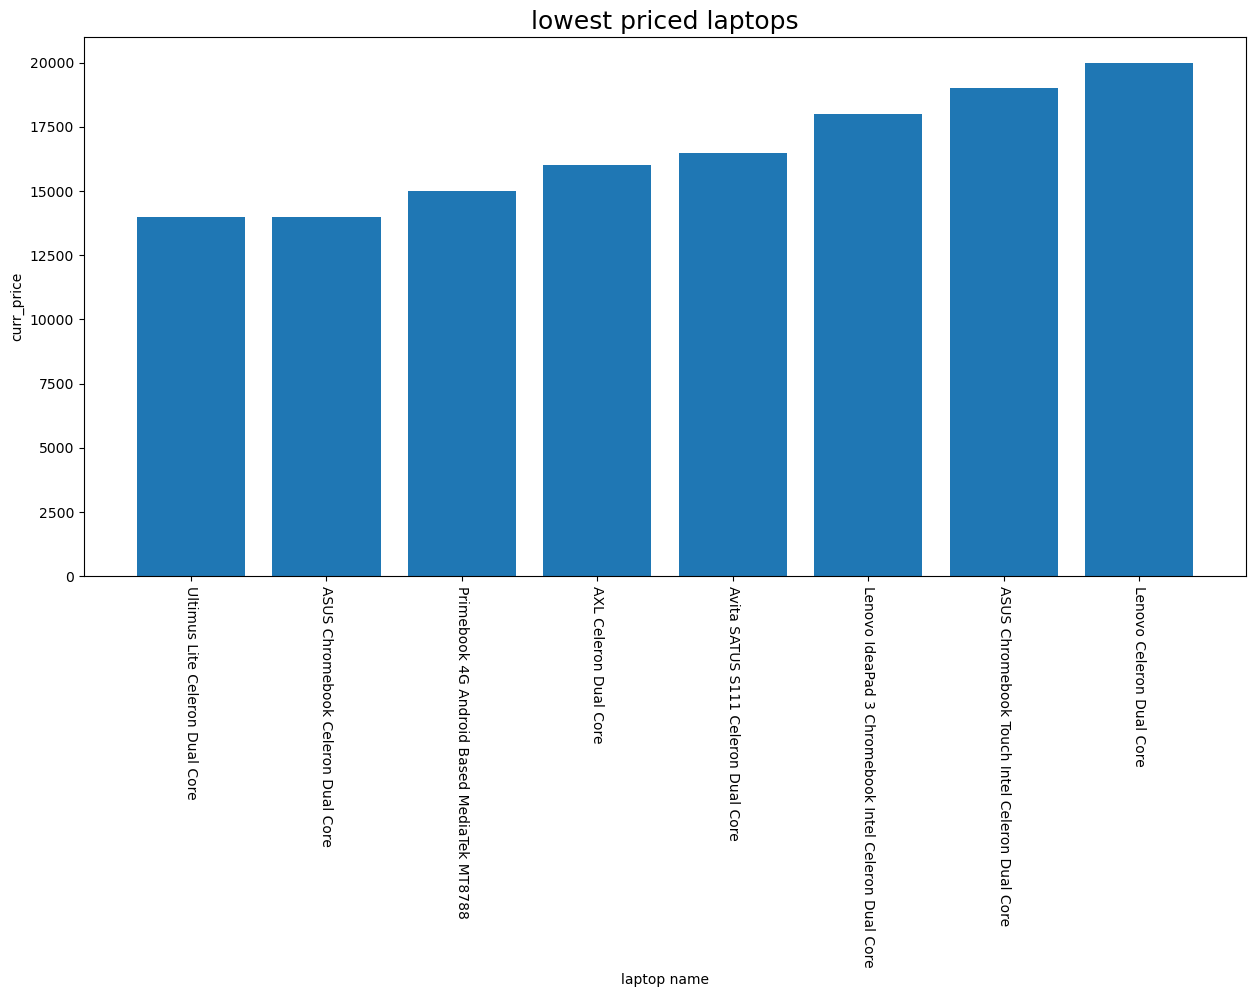

In [19]:
plt.figure(figsize=(15,7))
plt.bar(x=top10_affordable['product_name'],height=top10_affordable['curr_price'])
plt.title('lowest priced laptops',fontsize=18)
plt.xlabel('laptop name')
plt.ylabel('curr_price')
plt.xticks(rotation=270)
plt.show()

## Calculating discount

In [20]:
smalldf=df2[['product_name','curr_price','mrp']]
smalldf

product_name  curr_price    mrp
0           Ultimus Lite Celeron Dual Core       13990  20990
1           Ultimus Elite Core i5 10th Gen       26990  45990
2        ASUS Vivobook 15 Core i3 11th Gen       37990  56990
3        ASUS Vivobook 15 Core i5 11th Gen       47990  70990
4     HP 15s (2023) Intel Core i3 12th Gen       42990  51266
..                                     ...         ...    ...
515                HP 14s Core i3 10th Gen       36750  36870
518  HP Chromebook Intel Celeron Dual Core       24900  31990
519         DELL Inspiron Core i3 11th Gen       48190  56000
520  DELL Inspiron Ryzen 3 Dual Core 3250U       43500  56000
521             HP Ryzen 5 Octa Core 3500u       36490  48990

[297 rows x 3 columns]

In [21]:
smalldf['discount']=smalldf['mrp']-smalldf['curr_price']

C:\Users\gargs\AppData\Local\Temp\ipykernel_42756\1426680961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smalldf['discount']=smalldf['mrp']-smalldf['curr_price']


### Highest discounted laptop

In [22]:
smalldf.sort_values(by='discount',ascending=False)

product_name  curr_price    mrp  discount
43                          DELL Core i3 11th Gen       38480  88990     50510
212                DELL Inspiron Core i5 11th Gen       49890  90783     40893
430                         DELL Core i3 11th Gen       39990  78632     38642
455          Lenovo ThinkPad E14 Core i3 12th Gen       48000  85999     37999
20   Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen       47290  84590     37300
..                                            ...         ...    ...       ...
431                HP 15s Ryzen 3 Dual Core 3200U       38000  38500       500
511                  DELL Vostro Core i3 10th Gen       38250  38538       288
336                DELL Inspiron Core i3 11th Gen       45990  46156       166
515                       HP 14s Core i3 10th Gen       36750  36870       120
283               Acer Aspire 3 Pentium Quad Core       37990      0    -37990

[297 rows x 4 columns]

In [23]:
df2.columns

Index(['product_name', 'stars', 'rating', 'reviews', 'curr_price', 'mrp',
       'processor', 'ram', 'image'],
      dtype='object')

In [24]:
df2

product_name  stars  rating  reviews  \
0           Ultimus Lite Celeron Dual Core    4.3       7        0   
1           Ultimus Elite Core i5 10th Gen    3.9       9        2   
2        ASUS Vivobook 15 Core i3 11th Gen    4.3    4381      396   
3        ASUS Vivobook 15 Core i5 11th Gen    4.3    2693      208   
4     HP 15s (2023) Intel Core i3 12th Gen    4.3     463       40   
..                                     ...    ...     ...      ...   
515                HP 14s Core i3 10th Gen    4.2     828      111   
518  HP Chromebook Intel Celeron Dual Core    3.6     274       27   
519         DELL Inspiron Core i3 11th Gen    4.2      16        0   
520  DELL Inspiron Ryzen 3 Dual Core 3250U    4.5      66       11   
521             HP Ryzen 5 Octa Core 3500u    3.3       3        0   

     curr_price    mrp                           processor            ram  \
0         13990  20990   Intel Celeron Dual Core Processor  4 GB DDR4 RAM   
1         26990  45990  Intel Core i5 Processor (10th Gen)  8 GB DDR4 RAM   
2         37990  56990  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
3         47990  70990  Intel Core i5 Processor (11th Gen)  8 GB DDR4 RAM   
4         42990  51266  Intel Core i3 Processor (12th Gen)  8 GB DDR4 RAM   
..          ...    ...                                 ...            ...   
515       36750  36870  Intel Core i3 Processor (10th Gen)  4 GB DDR4 RAM   
518       24900  31990   Intel Celeron Dual Core Processor  4 GB DDR4 RAM   
519       48190  56000  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
520       43500  56000     AMD Ryzen 3 Dual Core Processor  8 GB DDR4 RAM   
521       36490  48990     AMD Ryzen 5 Octa Core Processor  8 GB DDR4 RAM   

                                                 image  
0    https://rukminim2.flixcart.com/image/312/312/x...  
1    https://rukminim2.flixcart.com/image/312/312/x...  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
515  https://rukminim2.flixcart.com/image/312/312/k...  
518  https://rukminim2.flixcart.com/image/312/312/k...  
519  https://rukminim2.flixcart.com/image/312/312/k...  
520  https://rukminim2.flixcart.com/image/312/312/k...  
521  https://rukminim2.flixcart.com/image/312/312/k...  

[297 rows x 9 columns]

In [25]:
RAM=input('RAM?: ')
PROCESSOR=input('Processor?: ')
df2[df2.ram==RAM]
df2[df2.processor==PROCESSOR]

RAM?: 4 GB DDR4 RAM
Processor?: Intel Core i3 Processor (10th Gen)


product_name  stars  rating  reviews  \
38   Infinix INBook Y1 Plus Intel Core i3 10th Gen    4.1    1746      225   
63   Infinix INBook Y1 Plus Intel Core i3 10th Gen    4.1    1746      225   
171                 DELL Inspiron Core i3 10th Gen    4.3      63        5   
173       ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3   12146     1167   
210        Lenovo IdeaPad 3 Intel Core i3 10th Gen    4.3     827       80   
221                         CHUWI Core i3 10th Gen    4.3     108       26   
233                 DELL Inspiron Core i3 10th Gen    3.8      68        5   
236                          ASUS Core i3 10th Gen    4.3    2797      312   
247                      HP Intel Core i3 10th Gen    4.3    1478      139   
271                 DELL Inspiron Core i3 10th Gen    3.7      96        9   
280        Infinix X1 Slim Series Core i3 10th Gen    4.3    3775      447   
323                   DELL Vostro Core i3 10th Gen    4.2      53        5   
343        Infinix X1 Slim Series Core i3 10th Gen    4.3    3775      447   
350              ASUS VivoBook 14 Core i3 10th Gen    4.8      14        2   
351        Lenovo IdeaPad 3 Intel Core i3 10th Gen    4.3    4149      426   
391                 DELL Inspiron Core i3 10th Gen    4.2      46        4   
400                          ASUS Core i3 10th Gen    4.3      52        0   
401        Lenovo IdeaPad 3 Intel Core i3 10th Gen    5.0       6        0   
484        Infinix X1 Slim Series Core i3 10th Gen    4.3    1377      220   
488                        Lenovo Core i3 10th Gen    3.7     427       55   
491        Lenovo IdeaPad 3 Intel Core i3 10th Gen    4.2     494       54   
500           Lenovo Ideapad S145 Core i3 10th Gen    4.0     818      100   
508            DELL Inspiron 3501 Core i3 10th Gen    3.9       8        2   
510                   DELL Vostro Core i3 10th Gen    4.4      92       11   
511                   DELL Vostro Core i3 10th Gen    4.3    1275      140   
515                        HP 14s Core i3 10th Gen    4.2     828      111   

     curr_price    mrp                           processor               ram  \
38        28990  49990  Intel Core i3 Processor (10th Gen)  8 GB LPDDR4X RAM   
63        27990  44990  Intel Core i3 Processor (10th Gen)  8 GB LPDDR4X RAM   
171       44190  54723  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
173       35500  50990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
210       37990  54990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
221       24990  49990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
233       41590  55534  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
236       35990  49990  Intel Core i3 Processor (10th Gen)     4 GB DDR4 RAM   
247       46990  47990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
271       37990  47341  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
280       31490  49999  Intel Core i3 Processor (10th Gen)  8 GB LPDDR4X RAM   
323       40490  57858  Intel Core i3 Processor (10th Gen)     4 GB DDR4 RAM   
343       35990  49999  Intel Core i3 Processor (10th Gen)  8 GB LPDDR4X RAM   
350       45000  49000  Intel Core i3 Processor (10th Gen)     4 GB DDR4 RAM   
351       35990  57990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
391       43400  60490  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
400       33990  43990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
401       36600  56999  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
484       33490  54999  Intel Core i3 Processor (10th Gen)  8 GB LPDDR4X RAM   
488       38990  57990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
491       36990  45999  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
500       34000  39596  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
508       36990  45990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
510       4

In [44]:
df2.groupby('ram')['product_name'].count()

ram
16 GB DDR4 RAM                                       13
16 GB LPDDR4X RAM                                     1
2 GB LPDDR4 RAM                                       1
4 GB DDR3 RAM                                         2
4 GB DDR4 RAM                                        44
4 GB LPDDR4 RAM                                       6
4 GB LPDDR4X RAM                                      3
8 GB DDR4 RAM                                       186
8 GB LPDDR4 RAM                                       1
8 GB LPDDR4X RAM                                     16
8 GB LPDDR5 RAM                                      17
Intel Core i5 Processor (11th Gen)                    1
LPDDR5 RAM -faster & low power consuming              2
RAM & Storage: 8GB DDR4 & 256GB SSD                   1
RAM & Storage: 8GB DDR4 & 512GB SSD                   2
RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 1TB HDD      1
Name: product_name, dtype: int64

In [50]:
df_4gb=df2[df2['ram'].str.contains('4 GB')]
df_4gb

product_name  stars  rating  \
0                       Ultimus Lite Celeron Dual Core    4.3       7   
7           Primebook 4G Android Based MediaTek MT8788    4.1    1507   
11          Primebook 4G Android Based MediaTek MT8788    4.1     502   
13                   ASUS Chromebook Celeron Dual Core    3.6     419   
64                       Lenovo Athlon Dual Core 3050U    3.9     184   
77                                HP Celeron Dual Core    4.0    1885   
81                           HP Athlon Dual Core 3050U    4.0     129   
88                       ASUS (2022) Celeron Dual Core    4.2     284   
107                      Lenovo Athlon Dual Core 3150U    3.5      48   
123                 Lenovo IdeaPad 3 Celeron Dual Core    4.4     172   
138                  ASUS EeeBook 12 Celeron Dual Core    4.1      71   
150  Infinix Y1 Plus Neo (2023) Celeron Quad Core 1...    4.1     770   
191                            Lenovo Core i3 11th Gen    4.3     223   
217      ASUS Chromebook Touch Intel Celeron Dual Core    3.8    1950   
236                              ASUS Core i3 10th Gen    4.3    2797   
250                    ASUS Celeron Dual Core 10th Gen    4.3       3   
253          ASUS VivoBook 15 Ryzen 3 Dual Core AMD R3    4.3    1677   
260                 Avita SATUS S111 Celeron Dual Core    3.7    1236   
283                    Acer Aspire 3 Pentium Quad Core    3.7      43   
291                                          Lenovo A6    3.7      95   
310               Smartron t.book flex Core i5 7th Gen    3.9      28   
312               Smartron t.book flex Core i5 7th Gen    3.5      30   
313                       Acer Aspire 3 Pentium Silver    4.3      48   
317                   ASUS ExpertBook Core i3 11th Gen    0.0       0   
320                        Lenovo V15 Core i3 11th Gen    4.2       6   
323                       DELL Vostro Core i3 10th Gen    4.2      53   
331                            Lenovo Core i3 11th Gen    3.9      68   
336                     DELL Inspiron Core i3 11th Gen    4.4     126   
337                     Acer Aspire 5 Core i3 11th Gen    4.4     171   
341              Acer Aspire 3 Ryzen 3 Dual Core 3250U    0.0       0   
350                  ASUS VivoBook 14 Core i3 10th Gen    4.8      14   
365                           Lenovo Celeron Dual Core    3.8     621   
366                     Lenovo Ryzen 3 Dual Core 3250U    3.6      93   
372                         HP intel Celeron Dual Core    3.7     233   
380               Lenovo ThinkPad E15 Core i3 11th Gen    4.0      66   
395                     Acer Aspire 5 Core i3 11th Gen    4.2     294   
405                       DELL Vostro Core i3 11th Gen    3.7      10   
408              Lenovo IdeaPad 3 CB Celeron Dual Core    3.5      19   
411                              ASUS Core i3 11th Gen    5.0       3   
418                     Acer Aspire 3 Core i3 11th Gen    4.2      65   
431                     HP 15s Ryzen 3 Dual Core 3200U    4.4     784   
441                     Acer Aspire 5 Core i5 11th Gen    0.0       0   
448                  Acer Chromebook Celeron Dual Core    3.5      67   
451                           HP 14s Celeron Dual Core    4.0    1885   
461                              AXL Celeron Dual Core    3.7      47   
474                           Lenovo Ryzen 3 Dual Core    0.0       0   
478           ASUS VivoBook 15 (2022) Core i3 11th Gen    4.3    1908   
481                 Avita SATUS S111 Celeron Dual Core    3.7    1236   
499                    Acer Aspire 3 Celeron Dual Core    4.4      25   
505               DELL Latitude Series Core i3 8th Gen    4.0      28   
509                      Acer Aspire 3 Dual Core 3020e    4.1     896   
510                       DELL Vostro Core i3 10th Gen    4.4      92   
511                       DELL Vostro Core i3 10th Gen    4.3    1275   
515                            HP 14s Core i3 10th Gen    4.2     828   
518              HP Chromeb

In [51]:
df_8gb=df2[df2['ram'].str.contains('8 GB')]
df_8gb

product_name  stars  rating  reviews  \
1                  Ultimus Elite Core i5 10th Gen    3.9       9        2   
2               ASUS Vivobook 15 Core i3 11th Gen    4.3    4381      396   
3               ASUS Vivobook 15 Core i5 11th Gen    4.3    2693      208   
4            HP 15s (2023) Intel Core i3 12th Gen    4.3     463       40   
5    Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen    4.3    6893      635   
..                                            ...    ...     ...      ...   
508           DELL Inspiron 3501 Core i3 10th Gen    3.9       8        2   
514                HP 14s Intel Celeron Dual Core    3.8     533       44   
519                DELL Inspiron Core i3 11th Gen    4.2      16        0   
520         DELL Inspiron Ryzen 3 Dual Core 3250U    4.5      66       11   
521                    HP Ryzen 5 Octa Core 3500u    3.3       3        0   

     curr_price    mrp                           processor            ram  \
1         26990  45990  Intel Core i5 Processor (10th Gen)  8 GB DDR4 RAM   
2         37990  56990  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
3         47990  70990  Intel Core i5 Processor (11th Gen)  8 GB DDR4 RAM   
4         42990  51266  Intel Core i3 Processor (12th Gen)  8 GB DDR4 RAM   
5         38190  63190  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
..          ...    ...                                 ...            ...   
508       36990  45990  Intel Core i3 Processor (10th Gen)  8 GB DDR4 RAM   
514       33590  36390   Intel Celeron Dual Core Processor  8 GB DDR4 RAM   
519       48190  56000  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
520       43500  56000     AMD Ryzen 3 Dual Core Processor  8 GB DDR4 RAM   
521       36490  48990     AMD Ryzen 5 Octa Core Processor  8 GB DDR4 RAM   

                                                 image  
1    https://rukminim2.flixcart.com/image/312/312/x...  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
5    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
508  https://rukminim2.flixcart.com/image/312/312/k...  
514  https://rukminim2.flixcart.com/image/312/312/x...  
519  https://rukminim2.flixcart.com/image/312/312/k...  
520  https://rukminim2.flixcart.com/image/312/312/k...  
521  https://rukminim2.flixcart.com/image/312/312/k...  

[220 rows x 9 columns]

In [52]:
df_16gb=df2[df2['ram'].str.contains('16 GB')]
df_16gb

product_name  stars  rating  reviews  \
10         Lenovo IdeaPad Ryzen 5 Hexa Core 5500U    4.3    2353      250   
20   Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen    4.2    1028       73   
45                    MSI Ryzen 5 Hexa Core 7530U    4.4     221       31   
52                           MSI Core i5 11th Gen    4.1     172       27   
57              ASUS Vivobook 15 Core i3 11th Gen    4.3     207       16   
73                           MSI Core i3 12th Gen    0.0       0        0   
141                    HP Ryzen 5 Hexa Core 5500U    4.3     435       31   
212                DELL Inspiron Core i5 11th Gen    4.3      20        4   
292                Acer Aspire 3 Core i5 12th Gen    3.9     118       13   
293                    HP Ryzen 5 Hexa Core 5500U    4.3     933       99   
301                           Valve Zen 2 2nd Gen    4.0       3        0   
302                           HP Core i3 12th Gen    0.0       0        0   
356                          HP Ryzen 5 Dual Core    0.0       0        0   
398       Infinix X1 Slim Series Core i5 10th Gen    4.0     750      112   

     curr_price    mrp                           processor                ram  \
10        49490  86290     AMD Ryzen 5 Hexa Core Processor     16 GB DDR4 RAM   
20        47290  84590  Intel Core i5 Processor (11th Gen)     16 GB DDR4 RAM   
45        44990  64990     AMD Ryzen 5 Hexa Core Processor     16 GB DDR4 RAM   
52        43990  59990  Intel Core i5 Processor (11th Gen)     16 GB DDR4 RAM   
57        39500  49990  Intel Core i3 Processor (11th Gen)     16 GB DDR4 RAM   
73        39990  58990  Intel Core i3 Processor (12th Gen)     16 GB DDR4 RAM   
141       47440  59241     AMD Ryzen 5 Hexa Core Processor     16 GB DDR4 RAM   
212       49890  90783  Intel Core i5 Processor (11th Gen)     16 GB DDR4 RAM   
292       49950  67999  Intel Core i5 Processor (12th Gen)     16 GB DDR4 RAM   
293       47099  59108     AMD Ryzen 5 Hexa Core Processor     16 GB DDR4 RAM   
301       49490  55990       AMD Zen 2 Processor (2nd Gen)     16 GB DDR4 RAM   
302       45199  52800  Intel Core i3 Processor (12th Gen)     16 GB DDR4 RAM   
356       44990  59990     AMD Ryzen 5 Dual Core Processor     16 GB DDR4 RAM   
398       49990  64999  Intel Core i5 Processor (10th Gen)  16 GB LPDDR4X RAM   

                                                 image  
10   https://rukminim2.flixcart.com/image/312/312/x...  
20   https://rukminim2.flixcart.com/image/312/312/x...  
45   https://rukminim2.flixcart.com/image/312/312/x...  
52   https://rukminim2.flixcart.com/image/312/312/x...  
57   https://rukminim2.flixcart.com/image/312/312/x...  
73   https://rukminim2.flixcart.com/image/312/312/x...  
141  https://rukminim2.flixcart.com/image/312/312/x...  
212  https://rukminim2.flixcart.com/image/312/312/k...  
292  https://rukminim2.flixcart.com/image/312/312/x...  
293  https://rukminim2.flixcart.com/image/312/312/x...  
301  https://rukminim2.flixcart.com/image/312/312/x...  
302  https://rukminim2.flixcart.com/image/312/312/x...  
356  https://rukminim2.flixcart.com/image/312/312/x...  
398  https://rukminim2.flixcart.com/image/312/312/l...